<a href="https://colab.research.google.com/github/ModelEngineering/advancing-biomedical-models/blob/master/network-modeling-summer-school/parameter-fitting/Parameter_Fitting_Exercises_And_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARAMETER FITTING EXERCISES AND SOLUTIONS

# Preliminaries

## Installs

In [1]:
if True:
    !pip install SBStoat
    !pip install tellurium

     |████████████████████████████████| 28.1MB 119kB/s 
     |████████████████████████████████| 307kB 26.8MB/s 
     |████████████████████████████████| 122kB 43.4MB/s 
     |████████████████████████████████| 163kB 46.9MB/s 
     |████████████████████████████████| 6.2MB 24.2MB/s 
     |████████████████████████████████| 256kB 40.1MB/s 
     |████████████████████████████████| 36.7MB 85kB/s 
     |████████████████████████████████| 2.5MB 37.9MB/s 
     |████████████████████████████████| 3.1MB 36.4MB/s 
     |████████████████████████████████| 5.6MB 21.4MB/s 
     |████████████████████████████████| 16.6MB 188kB/s 
     |████████████████████████████████| 5.8MB 19.0MB/s 
     |████████████████████████████████| 2.0MB 19.6MB/s 
     |████████████████████████████████| 3.2MB 36.7MB/s 
  Created wheel for SBStoat: filename=SBstoat-1.161-cp37-none-any.whl size=80989 sha256=7c8d13c29cfebfb6f739dd32f33513544a81851682f8529819436815d8f60475
  Stored in directory: /root/.cache/pip/wheels/ac/5a/45/2d2e7dd6

## Imports

In [2]:
# Python packages used in this chapter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import pandas as pd
import urllib.request # use this library to download file from GitHub
if True:
  from SBstoat.namedTimeseries import NamedTimeseries, TIME
  from SBstoat.modelFitter import ModelFitter
  import SBstoat
  import tellurium as te

## Helper Functions
The helper functions reside in the course github repositor in the ``src`` folder. The codes below import these modules into the notebook.

In [3]:
def getSharedCodes(moduleName):
  """
  Obtains common codes from the github repository.

  Parameters
  ----------
  moduleName: str
      name of the python module in the src directory
  """
  url = "https://github.com/vporubsky/network-modeling-summer-school/raw/main/src/%s.py" % moduleName
  local_python = "python.py"
  _, _ = urllib.request.urlretrieve(url=url, filename=local_python)
  with open(local_python, "r") as fd:
    codeStr = "".join(fd.readlines())
  print(codeStr)
  exec(codeStr, globals())

# Acquire codes
getSharedCodes("util")

# TESTS
assert(isinstance(LINEAR_PATHWAY_DF, pd.DataFrame))

import pandas as pd
import urllib.request

# Linear pathway data
BASE_URL = "https://github.com/vporubsky/network-modeling-summer-school/raw/main/"
BASE_DATA_URL = "%sdata/" % BASE_URL
BASE_MODULE_URL = "%ssrc/" % BASE_URL
BASE_MODEL_URL = "%smodels/" % BASE_URL
LOCAL_FILE = "local_file.txt"


def getData(csvFilename):
    """
    Creates a dataframe from a CSV structured URL file.

    Parameters
    ----------
    csvFilename: str
        Name of the CSV file (w/o ".csv" extension)

    Returns
    -------
    pd.DataFrame
    """
    url = "%s%s.csv" % (BASE_DATA_URL, csvFilename)
    filename, _ = urllib.request.urlretrieve(url, filename=LOCAL_FILE)
    return pd.read_csv(LOCAL_FILE)

def getModule(moduleName):
    """
    Obtains common codes from the github repository.
  
    Parameters
    ----------
    moduleName: str
        name of the python module in the src directory
    """
    url = "%s%s.py" % (BASE_MODULE_URL, moduleName)
    _, _ = urllib.request.urlretrieve(url, fil

In [4]:
LINEAR_PATHWAY_ARR = LINEAR_PATHWAY_DF.to_numpy()

## Linear Pathway Model

In [5]:
print(LINEAR_PATHWAY_MODEL)

R1:  S1 -> S2; k1*S1  
R2: S2 -> S3; k2*S2
R3: S3 -> S4; k3*S3
R4: S4 -> S5; k4*S4

S1 = 10

// Parameters
k1 = 0; # Nominal value of parameter
k2 = 0; # Nominal value of parameter
k3 = 0; # Nominal value of parameter
k4 = 0; # Nominal value of parameter



# Exercise 1: Fitting Basics

For the ``LINEAR_PATHWWAY_MODEL`` model and ``LINEAR_PATHWAY_DF`` data:

1. Plot the residuals for all chemical species using a model with the true values of parameters. Use the values 1, 2, 3, 4 or ``k1``, ``k2``, ``k3``, ``k4``.
Where are the residuals the largest? Why?

1. Evaluate possible fits for ``k1``. You can quantify the "goodness" of a fit by calculating **RSQ**, the sum of squared residuals, for a set of parameter values. Use the values in ``PARAMETER_DCT`` for the parameters except for ``k1``. Run simulations with ``k1`` in the range $[0, 4]$ for 20 equally separated values. Plot RSQ. Where on the plot does the true value appear?

1. Use the approach in (2) to propose an algorithm for parameter estimation. (No code is required; just a description in words.) What is the performance of this algorithm as the number of parameters increases?

## (1) Plot the residuals

In [6]:
# True values of the parameters
PARAMETER_DCT = {"k1": 1, "k2": 2, "k3": 3, "k4":4}
# Create the Roadrunner object
rr = te.loada(LINEAR_PATHWAY_MODEL)
# Assign values to the kinetic constants
for name in PARAMETER_DCT.keys():
    rr[name] = PARAMETER_DCT[name]
# Run the simulation
modelArr = rr.simulate(1, 10, 100)
# Look at the result to ensure it makes sense
modelArr[0:10, :]

 [[       1,      10,        0,         0,          0,          0],
  [ 1.09091, 9.13101, 0.793478, 0.0689527, 0.00599194, 0.00057025],
  [ 1.18182, 8.33753,  1.38609,  0.230433,  0.0383089, 0.00763865],
  [ 1.27273,   7.613,  1.81722,   0.43377,   0.103541,  0.0324644],
  [ 1.36364, 6.95144,  2.11919,  0.646048,   0.196951,  0.0863733],
  [ 1.45455, 6.34736,  2.31846,   0.84685,   0.309323,   0.178002],
  [ 1.54545, 5.79578,  2.43667,   1.02443,   0.430692,   0.312421],
  [ 1.63636, 5.29213,  2.49147,   1.17295,   0.552208,   0.491243],
  [ 1.72727, 4.83225,  2.49719,   1.29048,   0.666889,   0.713191],
  [ 1.81818, 4.41233,  2.46546,   1.37762,   0.769768,   0.974815]]

In [7]:
# Look at the observed data
LINEAR_PATHWAY_ARR[0:10, :]

array([[1.00000000e+00, 8.51678036e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.09090909e+00, 7.45391115e+00, 7.61656564e-01, 7.37219347e-02,
        6.60778277e-03, 4.82334671e-04],
       [1.18181818e+00, 8.28286758e+00, 1.21277213e+00, 2.60522199e-01,
        3.87223027e-02, 7.03598959e-03],
       [1.27272727e+00, 7.61303021e+00, 1.81005756e+00, 3.52075303e-01,
        8.37075579e-02, 3.15814521e-02],
       [1.36363636e+00, 6.31537918e+00, 2.25440468e+00, 6.99869349e-01,
        1.59682183e-01, 8.52162442e-02],
       [1.45454545e+00, 7.60029359e+00, 2.53934763e+00, 1.00050901e+00,
        3.01052446e-01, 2.08922107e-01],
       [1.54545455e+00, 5.38910939e+00, 2.35260007e+00, 8.49514531e-01,
        3.69980464e-01, 3.06653894e-01],
       [1.63636364e+00, 5.41140224e+00, 2.98080193e+00, 1.20718732e+00,
        6.36913521e-01, 4.75265940e-01],
       [1.72727273e+00, 4.56449516e+00, 2.01172053e+00, 1.32967397e+00,
        6.53568960e-01, 

In [8]:
# Calculate residuals
residualsArr = LINEAR_PATHWAY_ARR - modelArr
# Recover the time
residualsArr[:, 0] = modelArr[:, 0]
# Look at the data
residualsArr[0:10, :]

 [[       1,    -1.48322,           0,          0,           0,            0],
  [ 1.09091,     -1.6771,  -0.0318214, 0.00476927, 0.000615846, -8.79153e-05],
  [ 1.18182,  -0.0546616,   -0.173318,  0.0300888, 0.000413433, -0.000602659],
  [ 1.27273, 2.63468e-05, -0.00716352, -0.0816947,  -0.0198331, -0.000882938],
  [ 1.36364,    -0.63606,    0.135216,  0.0538218,  -0.0372692,  -0.00115709],
  [ 1.45455,     1.25293,    0.220887,   0.153659, -0.00827052,    0.0309197],
  [ 1.54545,   -0.406673,  -0.0840728,  -0.174916,  -0.0607119,  -0.00576749],
  [ 1.63636,    0.119269,    0.489336,  0.0342381,   0.0847052,   -0.0159773],
  [ 1.72727,   -0.267756,   -0.485465,  0.0391899,  -0.0133198,     -0.13492],
  [ 1.81818,   -0.881612,   -0.463771,  -0.203834,   0.0985045,    0.0134523]]

In [9]:
# Let's put this together into a single function that we can use later
def calcResiduals(modelStr, observedArr, parameterDct, startTime=1, endTime=10):
    """
    Calculates the residuals for parameter assignments for a model given the observed values.

    Parameters
    ----------
    modelStr: str
        Antimony model
    observedArr: np.array
        matrix of observed values; first column is time
    parameterDct: dict
        key: parameter name
        value: parameter value
    startTime: int
    endTime: int

    Returns
    -------
    np.array
        col 0: time
        col 1-: float
    """
    # Create the Roadrunner object
    rr = te.loada(modelStr)
    # Assign values to the kinetic constants
    for name in parameterDct.keys():
        rr[name] = parameterDct[name]
    # Run the simulation
    modelArr = rr.simulate(startTime, endTime, 10*endTime)
    # Calculate residuals
    residualsArr = observedArr - modelArr
    residualsArr[:, 0] = modelArr[:, 0] # recover time
    #
    return residualsArr

# TESTS
residualsArr = calcResiduals(LINEAR_PATHWAY_MODEL, LINEAR_PATHWAY_ARR, 
                             PARAMETER_DCT)
assert(len(residualsArr) > 0)
assert("NamedArray" in str(type(residualsArr)))

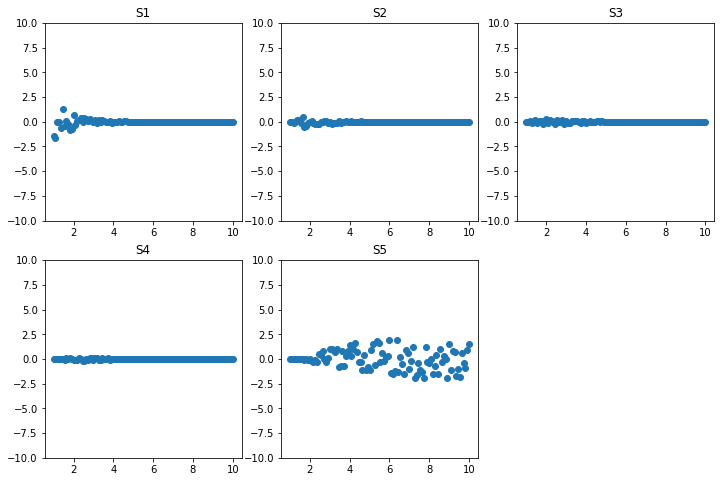

In [10]:
# Plot the result with separate plots for each species
fig = plt.figure(figsize=(12, 8))
numCol = 3
numRow = 2
# Use a customized plotting grid to avoid getting an empty plot
spec = gridspec.GridSpec(ncols=numCol, nrows=numRow, figure=fig)
# Do the plot
times = residualsArr[:, 0]
for idx, name in enumerate(modelArr.colnames[1:]):
    if idx < numCol:
        irow = 0
        icol = idx
    else:
        irow = 1
        icol = idx - numCol
    ax = fig.add_subplot(spec[irow, icol])
    ax.scatter(times, residualsArr[:, idx+1])
    title = name[1:-1] # Delete the square brackets around the species name
    ax.set_title(title)
    ax.set_ylim([-10, 10])

## (2) Evaluate possible fits for k1

In [11]:
kVals = [n*0.2 for n in range(21)]
parameterName = "k1"
rsqDct = {} # Container for the simulation results
for k1Val in kVals:
    parameterDct = dict(PARAMETER_DCT)
    parameterDct[parameterName] = k1Val
    residualsArr = calcResiduals(LINEAR_PATHWAY_MODEL, LINEAR_PATHWAY_ARR,
                                 parameterDct)
    rsqDct[k1Val] = sum(sum(residualsArr**2))

In [12]:
# Look at the result
rsqDct

{0.0: 19086.484006419174,
 0.2: 6556.518315938366,
 0.4: 4544.02587680233,
 0.6000000000000001: 4020.6562676528015,
 0.8: 3858.671270650337,
 1.0: 3818.7678452090317,
 1.2000000000000002: 3827.3999717264733,
 1.4000000000000001: 3856.4648285229077,
 1.6: 3893.7902333276493,
 1.8: 3933.717310571698,
 2.0: 3973.5290813284473,
 2.2: 4011.9280836959592,
 2.4000000000000004: 4048.331829994884,
 2.6: 4082.526817638539,
 2.8000000000000003: 4114.490930487699,
 3.0: 4144.299432111724,
 3.2: 4172.074291651174,
 3.4000000000000004: 4197.956511551074,
 3.6: 4222.091075608333,
 3.8000000000000003: 4244.6188687475005,
 4.0: 4265.673103645444}

Text(0.5, 1.0, 'Evaluation of k1 fits')

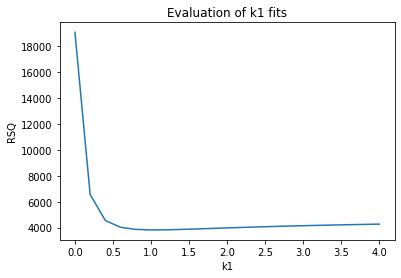

In [13]:
# Construct a plot
plt.plot(list(rsqDct.keys()), list(rsqDct.values()))
plt.xlabel("k1")
plt.ylabel("RSQ")
plt.title("Evaluation of k1 fits")

The true parameter value occurs at the ``k1`` value that has the lowest RSQ, about 1.0.

## (3) Simple Fitting Algorithm

    resultDct = {}
    for values in possibleValueAssignments
        parameterDct = assign values to parameters
        rsq = sum(calculateResiduals(parameterDct)
        resultDct[parameterDct] = rsq
    fittedParameters = parameterDct in resultDct that minimizes rsq
            

For $N$ parameters each of which has $M$ different values to explore (levels), the ``for`` loop iterates $M^N$ times.
For example, if there are 10 parameters each with 10 values, this is $10^{10}$!

# Exercise 2: Optimization

1. Apply ``scipy.optimize.minimize`` to the ``LINEARY_PATHWAY_MODEL`` to find values of the parameters ``k1, k2, k3, k4`` that minimize the sum of squares of the residuals for ``LINEAR_PATHWAY_DF``. *Hint*: Create a function that takes as input the values of the parameters of ``LINEAR_PATHWAY_MODEL`` and outputs the sum of squares of the residuals.

2. Questions
    1. How well does gradient descent do? Differential evolution?
    1. What happens when you use large bounds, say an upper bound of 1,000?

## Function to minimize

We begin by constructing the function to minimize. This is the equivalent to the ``distance`` function in the ``Optimization`` notebook.
We take advantage of the ``calcResiduals`` function that
calculates the residuals for a simulation of ``LINEAR_PATHWAY_MODEL``.

In [27]:
def functionToMinimize(parameterValues):
    """
    Parameters
    ----------
    parameterValues: list-float
        k1, k2, k3, k4
    """
    parameterDct = {"k%d" % (n + 1): parameterValues[n] for n in range(len(parameterValues))}
    residualsArr = calcResiduals(LINEAR_PATHWAY_MODEL, LINEAR_PATHWAY_ARR, parameterDct)
    return np.sum(residualsArr**2)

# TESTS
ssr1 = functionToMinimize([1, 2, 3, 4])
ssr2 = functionToMinimize([1, 1,  1, 1])
assert(ssr2 > ssr1)

## Do the minimization

In [43]:
from scipy.optimize import LinearConstraint

eye2Mat = np.identity(4) # Two dimensional identity matrix

constraints = LinearConstraint(eye2Mat, [0, 0, 0 , 0], [10, 10, 10, 10]),

In [44]:
# Optimization using gradient descent
from scipy.optimize import minimize

res = minimize(
    functionToMinimize,
    constraints=constraints,
    x0=(0, 0, 0, 0),
)

res.x

array([1.01353894, 2.15811087, 3.07934494, 4.2804306 ])

In [40]:
# Optimization using differential evolution
from scipy.optimize import differential_evolution

bounds = [(0, 10) for _ in range(4)]

res = differential_evolution(
    functionToMinimize,
    bounds=bounds,
)

res.x

array([1.01353765, 2.15812611, 3.0793244 , 4.28045634])

## Specific questions
1. Both gradient descent and differential evolution return resonable estimates of parameter values.
1. Larger bounds, like 1000, result in really bad parameter estimates.

# Exercise 3: Fitting Glycolytic Oscillations

This section illustrates parameter fitting using the Wolf model for glycolytic oscillations. We consider just two the several parameters: ``J1_n`` (a Hill constant) and ``J9_k`` (a kinetics rate constant).

Our starting point is the following:
1. **Fitting surface**. We consider all columns and all time.
1. **Search stategy**. We use differentiation evolution followed by Levenberg-Marquardt (leastsq)
1. **Search start & scope**. For both, we use the range ``[1, 100]`` with an initial value of 1.

Below is the definition of the parameter values (with the true values in the comment).

In [15]:
# Parameter ranges and initial value
WOLF_PARAMETERS = [
      SBstoat.Parameter("J1_n", lower=1, value=1, upper=100),  # True value is 4
      SBstoat.Parameter("J9_k", lower=1, value=1, upper=100),  # True value is 28                       
]

As before, we encapsulate our workflow in a ``doFit`` function. There is one subtly included here - the argument to ``fitModel``
has ``max_nfev`` set to ``None``. This value is passed to ``lmfit``, and instruct those codes to use an unlimited number
of iterations to converge.
This is useful in more complex models, but it can come at the cost of increased computation times.

In [16]:
def doFit(endTime=5, fitterMethods=["leastsq"], parametersToFit=WOLF_PARAMETERS,
          isTest=False):
    """
    Fit the Wolf Model.

    Parameters
    ----------
    endTime: int
    fitterMethods: list-str
    parametersToFit: list-SBstoat.Parameter
    """
    model = te.loada(WOLF_MODEL)
    observedTS = NamedTimeseries(dataframe=WOLF_DF)
    # Find the last index to use
    lastIdx = len([t for t in observedTS[TIME] if t <= endTime])
    observedTS = observedTS[:lastIdx]
    # Construct the fitter and do the fit
    fitter = ModelFitter(model, observedTS, fitterMethods=fitterMethods, parametersToFit=parametersToFit)
    fitter.fitModel()
    if isTest:
        return fitter
    else:
        print(fitter.reportFit())
        fitter.plotFitAll(figsize=(24,16), numCol=2, color=["red", "blue"])
        return None

# TESTS
result = doFit(isTest=True)
assert(isinstance(result, ModelFitter))

We begin by assessing the fits and their quality.

[[Variables]]
    J1_n:  1.028253603631894
    J9_k:  1.0219603404772175
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 5500
    # variables        = 2
    chi-square         = 811182.483
    reduced chi-square = 147.541376
    Akaike info crit   = 27469.5972
    Bayesian info crit = 27482.8222
[[Correlations]] (unreported correlations are < 0.100)
    C(J1_n, J9_k) = -0.610


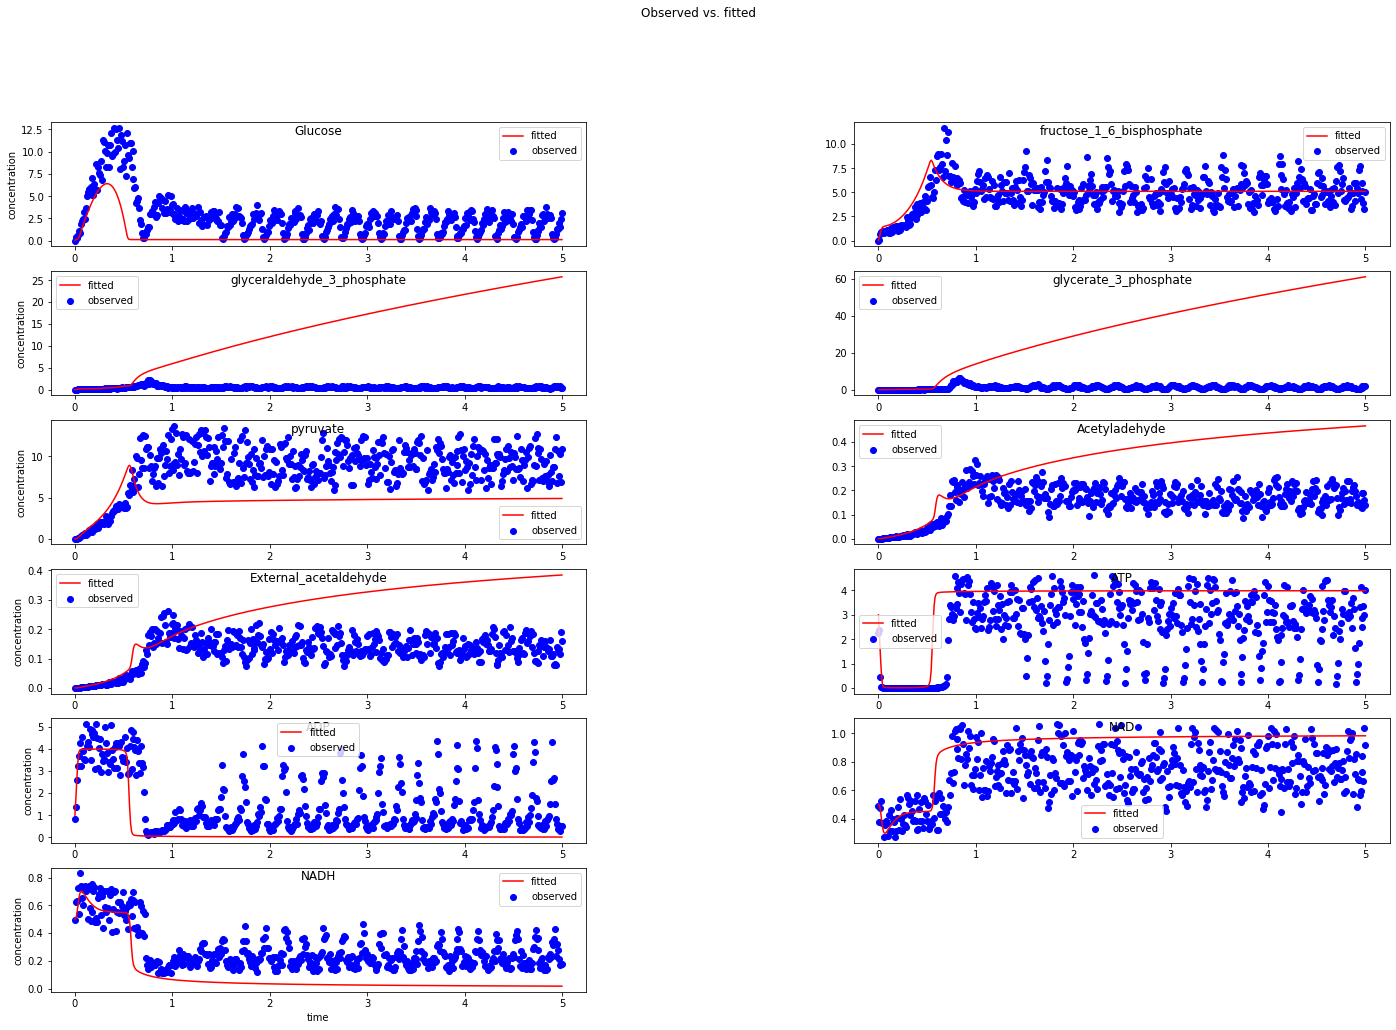

In [17]:
doFit()

Since this is our first attempt at fitting this model, it's difficult to make a judgement about the relative size of the chi-square values.
However, we can make a judgement about the fit quality from the above plots.
- There is a limited ability to capture the initial transient that occurs in the first 1 sec.
- There is no ability to capture the glycolytic oscillations.

We begin by addressing the the fitting surface by focusing on a more narrow time range, to balance better the initial transient and the oscillations.

[[Variables]]
    J1_n:  1.0000000505867408
    J9_k:  0.9999999999999996
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 2200
    # variables        = 2
    chi-square         = 62129.7616
    reduced chi-square = 28.2664975
    Akaike info crit   = 7353.68909
    Bayesian info crit = 7365.08151
[[Correlations]] (unreported correlations are < 0.100)
    C(J1_n, J9_k) = -0.422


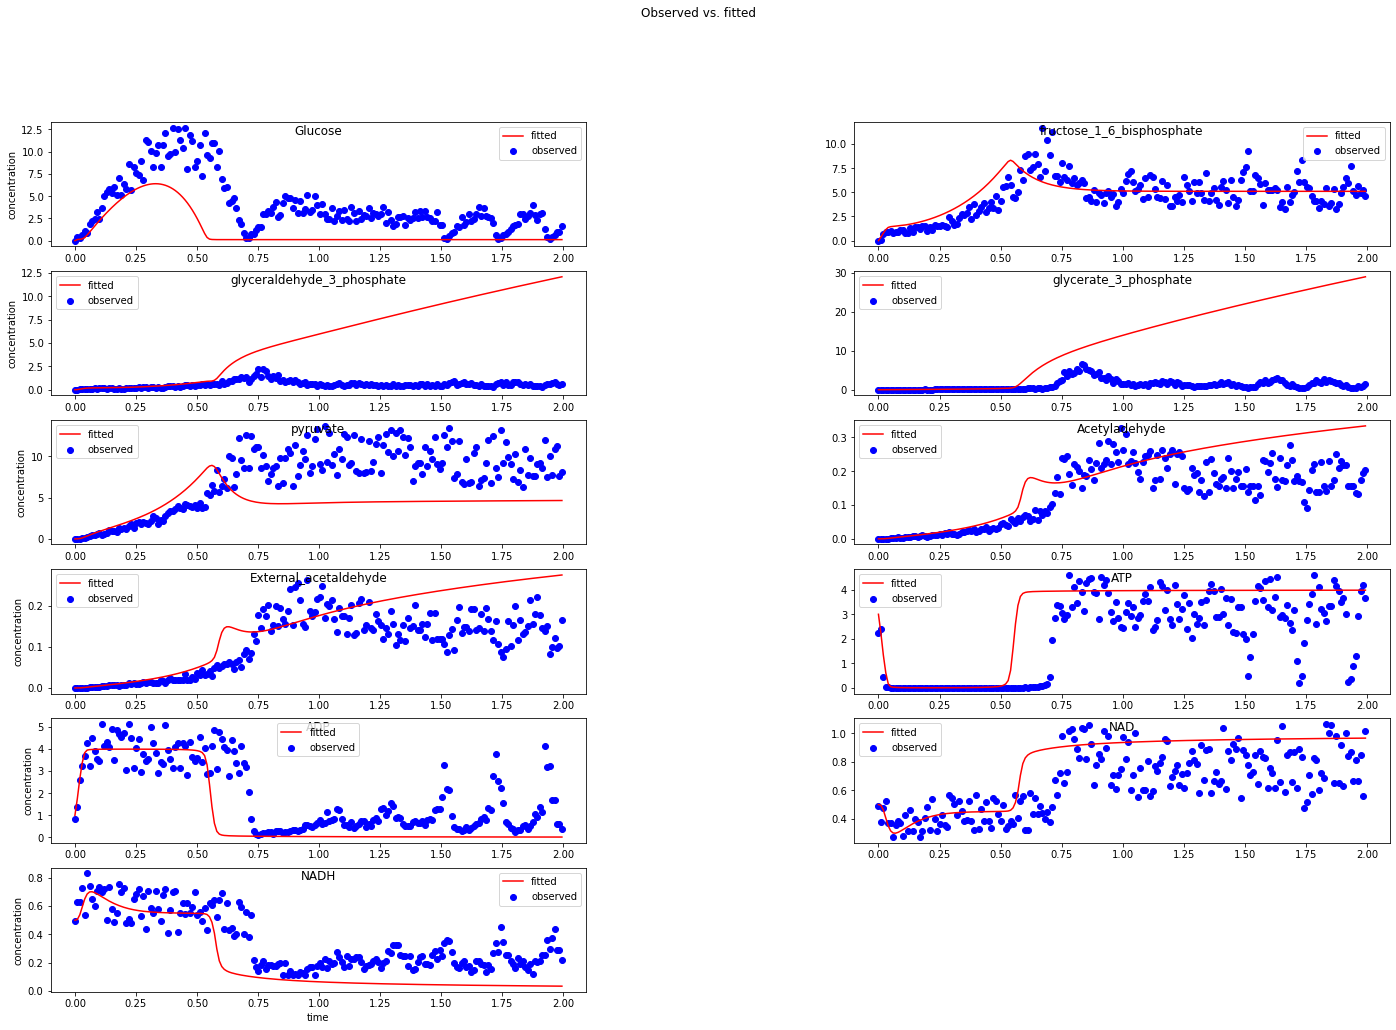

In [18]:
doFit(endTime=2)

The net effect is to get a "close up" of the initial part of the simulation, not to change
the values of the parameter estimates.

Next, we try a different search algorith, differential evolution.

[[Variables]]
    J1_n:  3.9987221769550745
    J9_k:  28.031011819884007
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 1047
    # data points      = 2200
    # variables        = 2
    chi-square         = 854.988883
    reduced chi-square = 0.38898493
    Akaike info crit   = -2075.27318
    Bayesian info crit = -2063.88075
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.


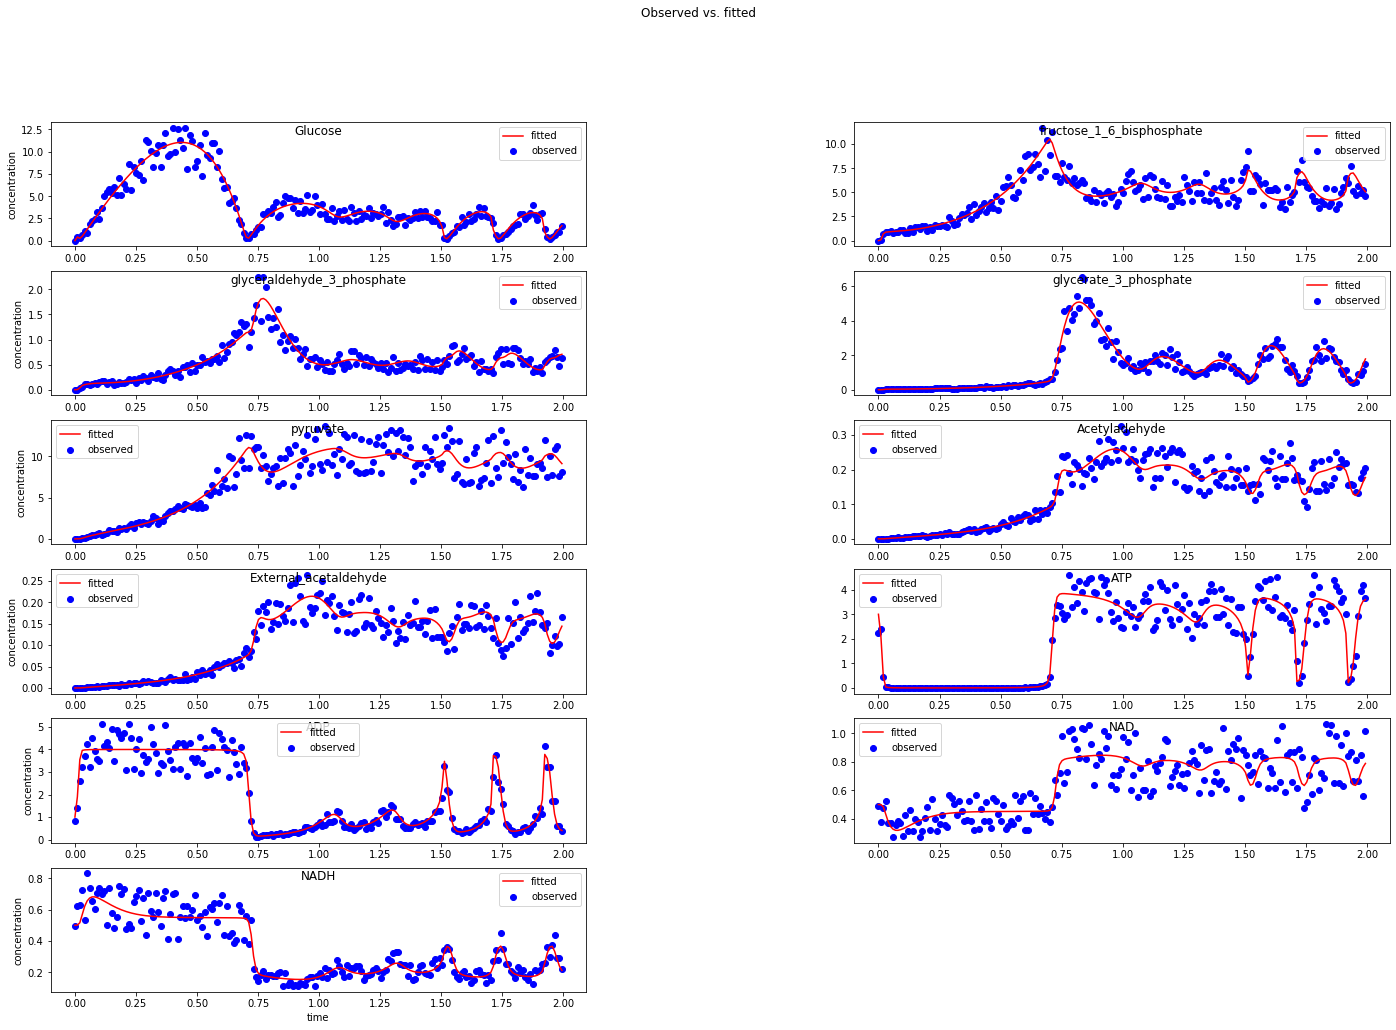

In [19]:
doFit(endTime=2, fitterMethods=["differential_evolution"])

This didn't seem to help much with capturing the oscillations. So, now we consider a different initial value for the parameters.

[[Variables]]
    J1_n:  3.998501485431252
    J9_k:  28.03260077576792
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 1068
    # data points      = 2200
    # variables        = 2
    chi-square         = 854.987144
    reduced chi-square = 0.38898414
    Akaike info crit   = -2075.27765
    Bayesian info crit = -2063.88523
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.


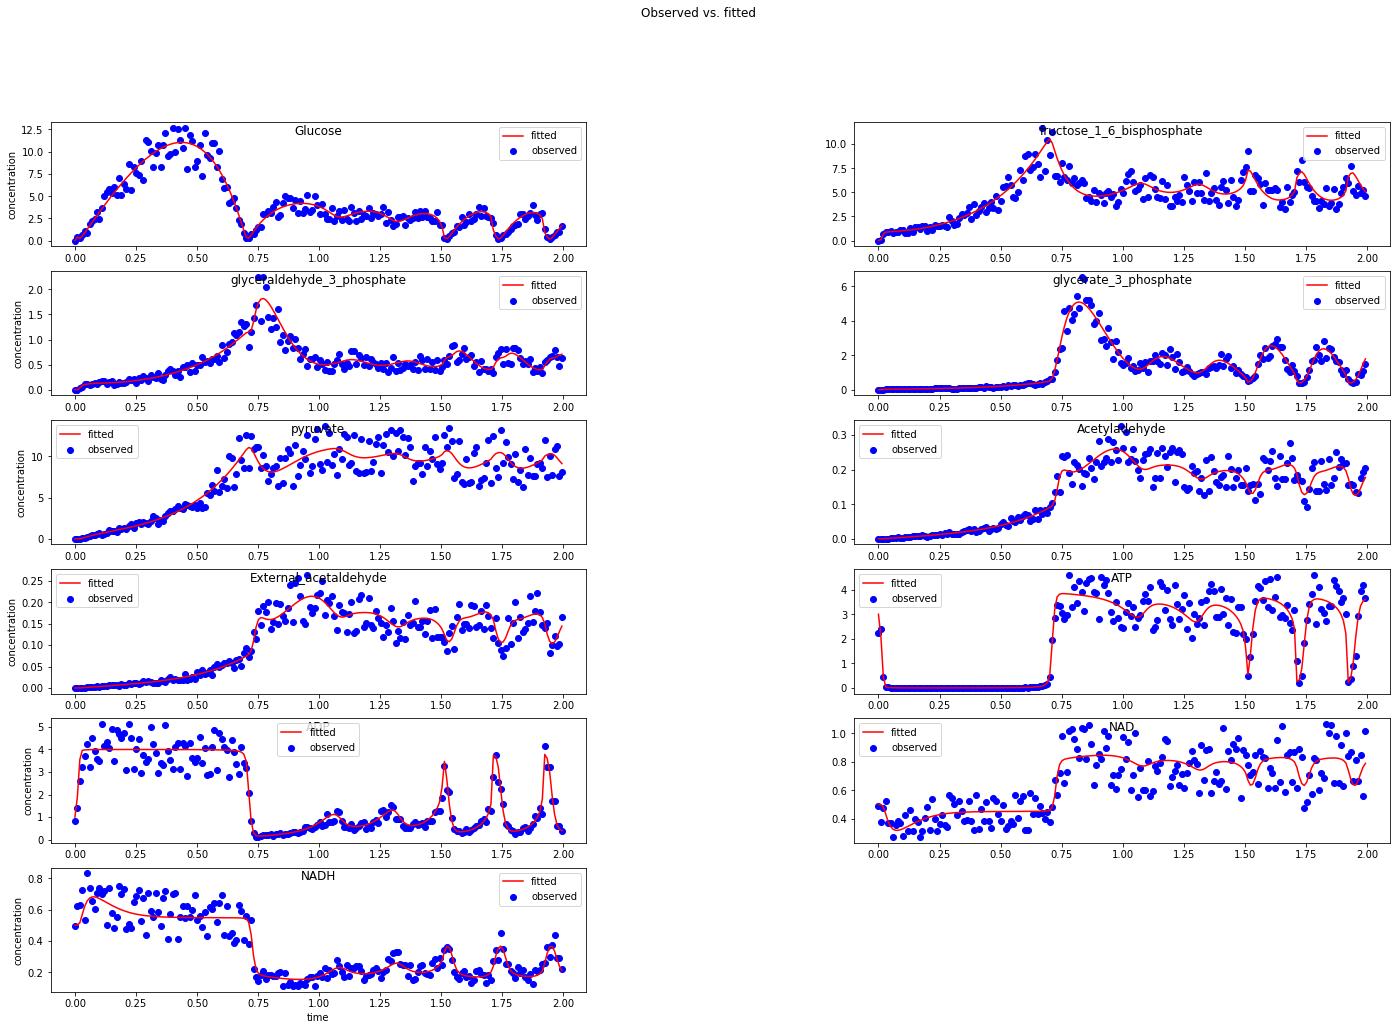

In [20]:
# Parameter ranges and initial value
WOLF_PARAMETERS_START_HIGH = [
    SBstoat.Parameter("J1_n", lower=1, value=100, upper=100),
    SBstoat.Parameter("J9_k", lower=1, value=100, upper=100),
]

doFit(endTime=2, fitterMethods=["differential_evolution"], parametersToFit=WOLF_PARAMETERS_START_HIGH)

Visually, this is a much better fit, catching both the initial transient and the oscillations.
Also, we see a dramatic reduction in the chi-square values.

Now, we try fitting on the entire time range.

[[Variables]]
    J1_n:  4.106272015155665
    J9_k:  28.98294283466616
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 1110
    # data points      = 5500
    # variables        = 2
    chi-square         = 2441.96025
    reduced chi-square = 0.44415428
    Akaike info crit   = -4461.70846
    Bayesian info crit = -4448.48346
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.


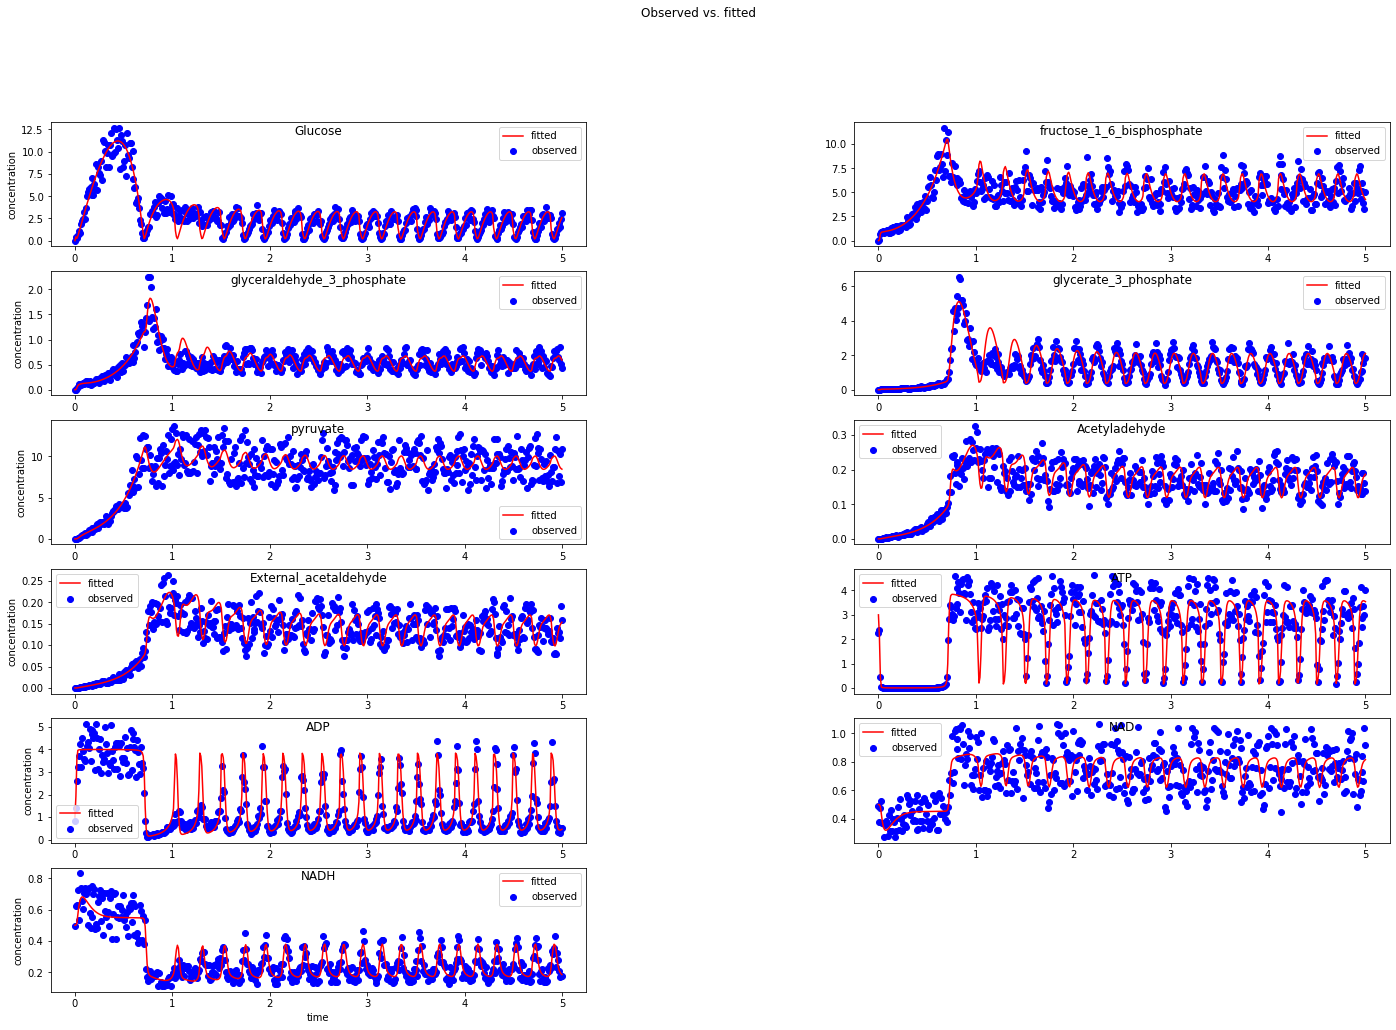

In [21]:
doFit(fitterMethods=["differential_evolution"], parametersToFit=WOLF_PARAMETERS_START_HIGH)

This works quite well!

At this point, we revisit whether it's necessary to use differential_evolution instead of leastsq since the former is much more computationally
intensive than the latter.

[[Variables]]
    J1_n:  4.001290896305169
    J9_k:  28.00510268830858
[[Fit Statistics]]
    # fitting method   = differential_evolution
    # function evals   = 1548
    # data points      = 5500
    # variables        = 2
    chi-square         = 2049.44355
    reduced chi-square = 0.37276165
    Akaike info crit   = -5425.48875
    Bayesian info crit = -5412.26374
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.


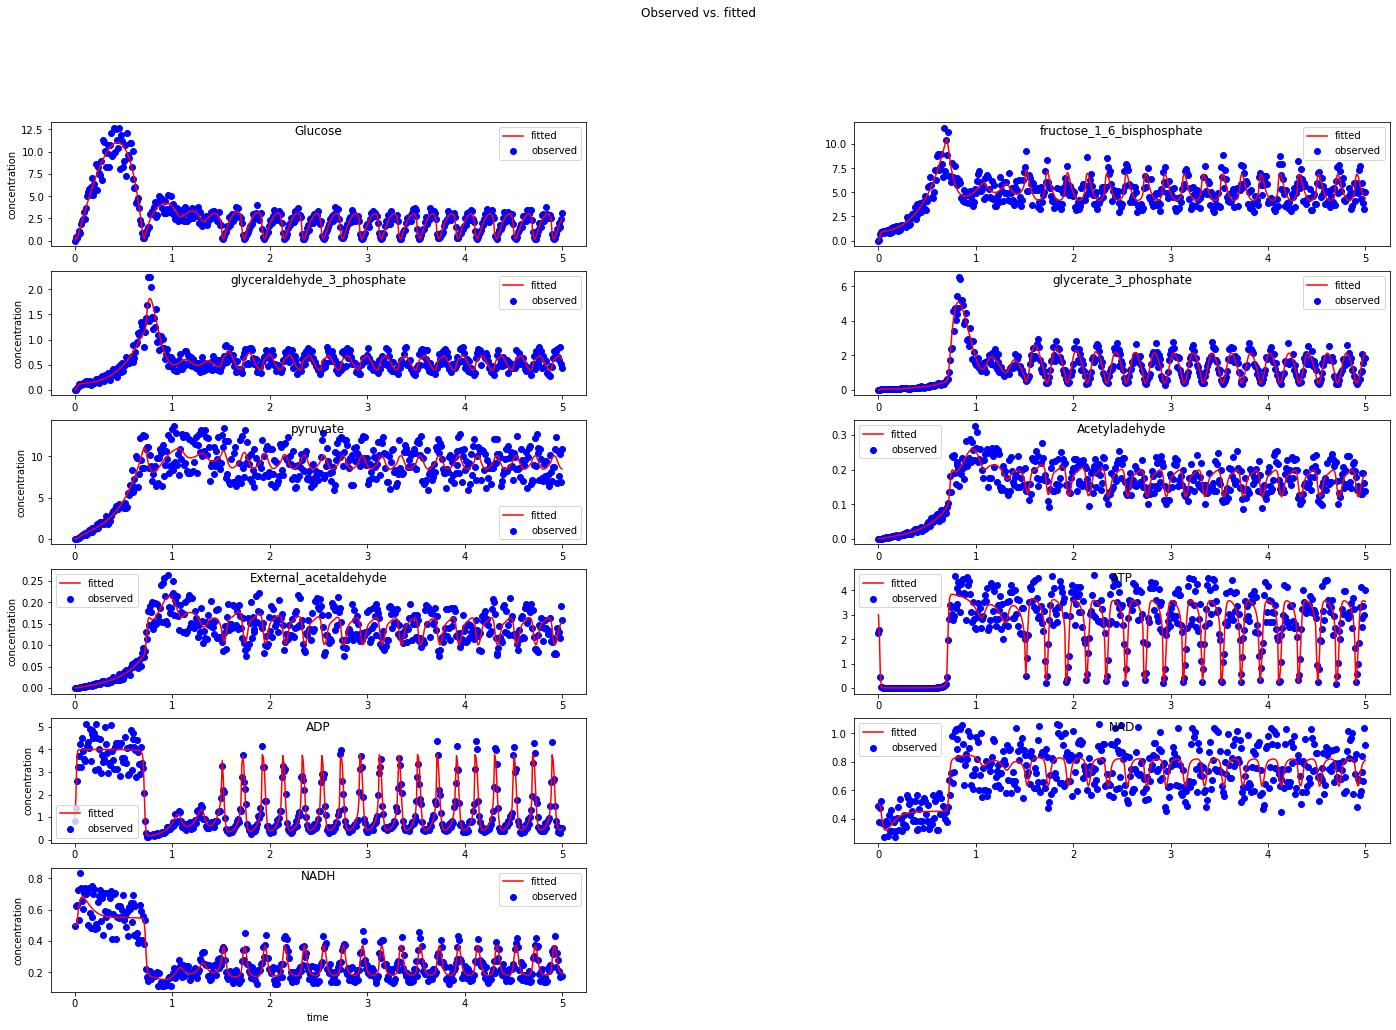

In [22]:
doFit(fitterMethods=["differential_evolution"], parametersToFit=WOLF_PARAMETERS)

[[Variables]]
    J1_n:  100.00074023678494
    J9_k:  100.00066822612997
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 5500
    # variables        = 2
    chi-square         = 22029.8308
    reduced chi-square = 4.00688082
    Akaike info crit   = 7636.07162
    Bayesian info crit = 7649.29663
[[Correlations]] (unreported correlations are < 0.100)
    C(J1_n, J9_k) = -0.976


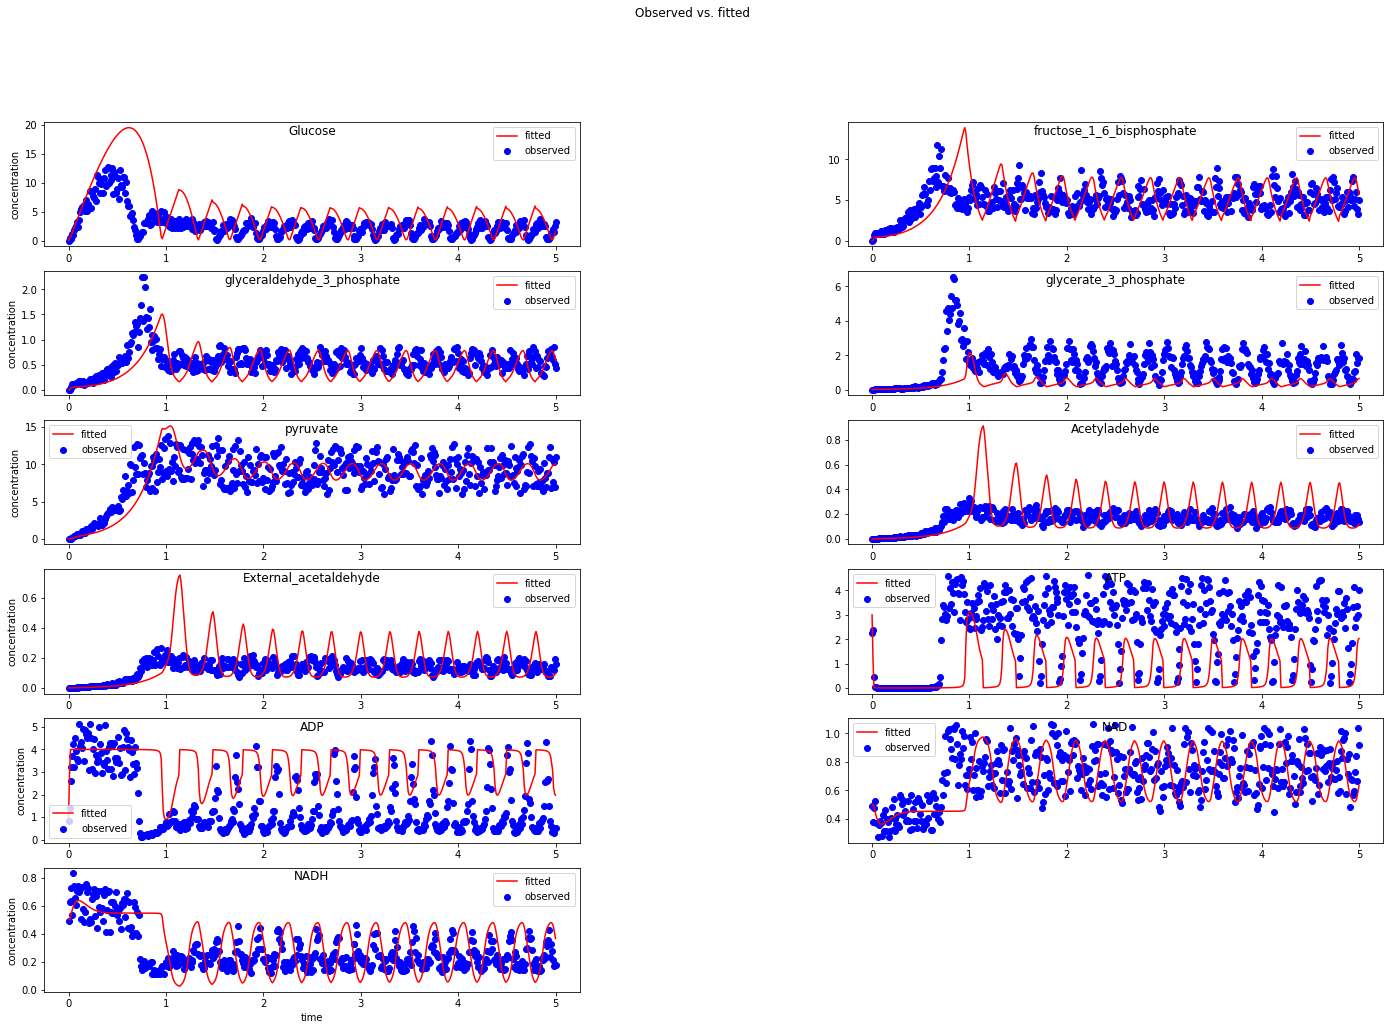

In [23]:
doFit(parametersToFit=WOLF_PARAMETERS_START_HIGH)

Clearly, the choice of the differential evolution optimization algorithm was critical to getting a good fit.

We conclude that the key to fitting these data are the following:
1. using the differential_evoluation optimization algorithm
1. start at the high end of the parameter ranges instead of the low end.